* [Video Game Charts, Game Sales, Top Sellers, Game Data - VGChartz](https://www.vgchartz.com/gamedb/)
* [GregorUT/vgchartzScrape: Scrapy project for data capture of vgchartz](https://github.com/GregorUT/vgchartzScrape)
* [Video Game Sales | Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("vgsales.csv")
df.shape

(16598, 11)

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
df.describe(include="O")

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


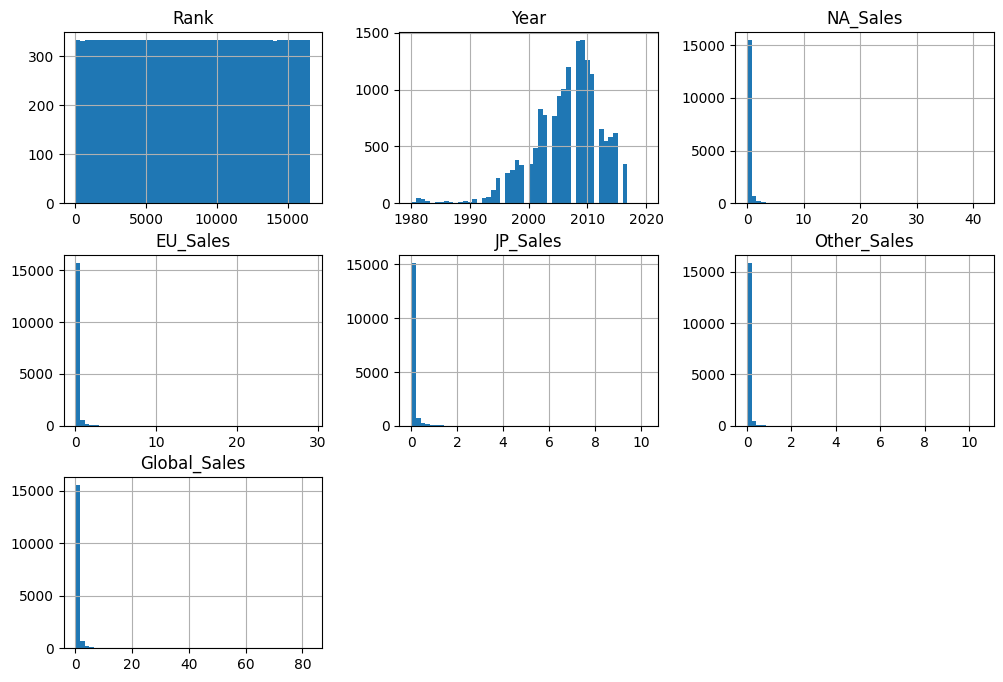

In [7]:
df.hist(bins=50, figsize=(12, 8));

In [8]:
corr = df.select_dtypes(include="number").corr()
corr

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


In [9]:
mask = np.tril(np.ones_like(corr))

<Axes: >

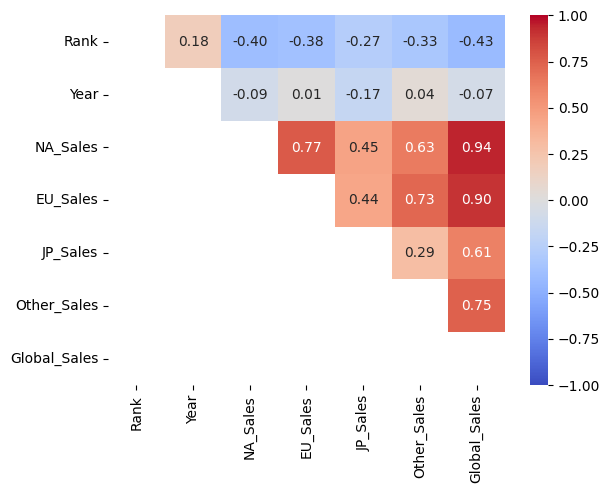

In [10]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask, vmin=-1, vmax=1)

In [18]:
obj_cols = df.select_dtypes(include="O").columns

for i, col in enumerate(obj_cols):
    display(df[col].value_counts()[:13].to_frame())

,count
Name,
Need for Speed: Most Wanted,12
Ratatouille,9
FIFA 14,9
LEGO Marvel Super Heroes,9
Madden NFL 07,9
Cars,8
FIFA Soccer 13,8
LEGO The Hobbit,8
Monopoly,8


,count
Platform,
DS,2163
PS2,2161
PS3,1329
Wii,1325
X360,1265
PSP,1213
PS,1196
PC,960
XB,824


,count
Genre,
Action,3316
Sports,2346
Misc,1739
Role-Playing,1488
Shooter,1310
Adventure,1286
Racing,1249
Platform,886
Simulation,867


,count
Publisher,
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
THQ,715
Nintendo,703
Sony Computer Entertainment,683
Sega,639
